### 导入依赖包

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


### 加载数据集

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


### 查看训练集图片

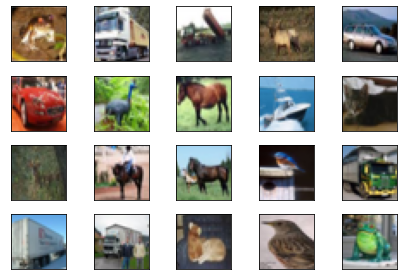

In [3]:
fig, ax = plt.subplots(nrows=4, ncols=5, sharex='all', sharey='all')
ax = ax.flatten()
for i in range(20):
    img = train_images[i]
    ax[i].imshow(img)
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### 查看标签类别

In [4]:
labels = np.unique(train_labels)
print(labels)

[0 1 2 3 4 5 6 7 8 9]


### 对图片进行归一化

In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0
print(train_images.shape, test_images.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


### 搭建模型

In [6]:
model = tf.keras.models.Sequential([
    Conv2D(filters=96, kernel_size=(3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(3, 3), strides=2),

    Conv2D(filters=256, kernel_size=(3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(3, 3), strides=2),

    Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(3, 3), strides=2),

    Flatten(),
    Dense(2048, activation='relu'),
    Dropout(0.5),
    Dense(2048, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

### 指定优化器、损失函数、评价指标

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

### 训练模型

In [8]:
history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 36s 16ms/step - loss: 1.6189 - acc: 0.4006 - val_loss: 1.4620 - val_acc: 0.4811
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2811 - acc: 0.5483 - val_loss: 1.2276 - val_acc: 0.5667
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1440 - acc: 0.6023 - val_loss: 1.1296 - val_acc: 0.6113
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0633 - acc: 0.6324 - val_loss: 1.1500 - val_acc: 0.6120
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0017 - acc: 0.6589 - val_loss: 1.4584 - val_acc: 0.4934
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9426 - acc: 0.6799 - val_loss: 1.5862 - val_acc: 0.5014
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9028 - acc: 0.6931 - val_loss: 1.1582 - val_acc: 0.6046
Epoch 8/10
1563/1563 [==========================

### 查看模型结构

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 96)        2688      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 256)       221440    
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 12, 12, 256)       0

### 显示模型准确率的变化过程

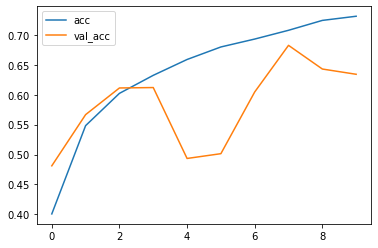

In [10]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()
plt.show()

### 显示模型损失的变化过程

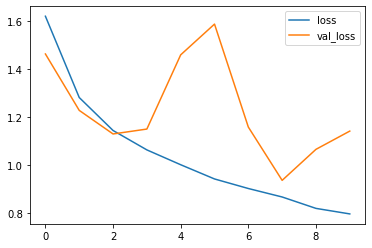

In [11]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()